In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'data/3_Countries_h.csv')
df.head()

,SlNo,Code,Country,2000,2005,2010,2014,2015,2016,2017,2019,2020
0,1,4,Afghanistan,0.0,1.2,4.0,7.0,8.3,10.6,11.4,NaN,18.8
1,2,8,Albania,0.1,6.0,45.0,60.1,63.3,66.4,71.8,73.5,NaN
2,3,12,Algeria,0.5,5.8,12.5,29.5,38.2,42.9,47.7,NaN,58.0
3,4,20,Andorra,10.5,37.6,81.0,95.9,96.9,97.9,98.9,98.9,NaN
4,5,24,Angola,0.1,1.1,2.8,10.2,12.4,13.0,14.3,NaN,21.5


In [3]:
years = ['2000', '2005', '2010', '2014', '2015', '2016', '2017', '2019', '2020']
start_year = 2021
length_years = 5
X_test = np.array(range(start_year, start_year + length_years)).reshape(length_years, 1)

# LOOP HERE

In [23]:
indexno = 16
penetration = []
for y in years:
    penetration.append(df.loc[indexno][y])

r = pd.DataFrame({'year': years, 'penetration': penetration})
r = r[r['penetration'].notnull()]
r

,year,penetration
0,2000,42.9
1,2005,65.4
2,2010,84.2
3,2014,96.8
4,2015,98.3
5,2016,98.0
6,2017,98.4
7,2019,98.4


In [24]:
poly = PolynomialFeatures(degree = 2)
linear_p = LinearRegression()
X = poly.fit_transform(r[['year']])
linear_p.fit(X, r['penetration'])
y = linear_p.predict(X)
print(y)

[41.81349261 67.27526391 85.48528882 94.83205134 96.44356734 97.76501347
 98.79638975 99.98893275]


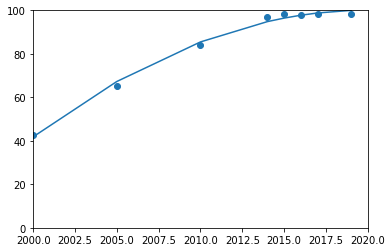

In [25]:
plt.axis([2000, 2020, 0, 100])
plt.scatter(r['year'].astype(int), r['penetration'])
plt.plot(r['year'].astype(int), y)
plt.show()

In [26]:
pred = linear_p.predict(poly.fit_transform(X_test))
for i in range(pred.shape[0]):
    pred[i] = 100 if pred[i] > 100 else pred[i]
    if(pred[i] == 100):
        for j in range(i+1, pred.shape[0]):
            pred[j] = 100
        break
print(pred)

[100. 100. 100. 100. 100.]


In [27]:
df2 = pd.DataFrame(columns = range(start_year, start_year+length_years))
df2.loc[indexno] = pred
df2

,2021,2022,2023,2024,2025
16,100.0,100.0,100.0,100.0,100.0
